# Evaluation Global State Model

import statements:

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

from keras.layers import Dense, Dropout

import tensorflow as tf
import numpy as np
from tqdm import tqdm
from keras.layers import Dense, Dropout, GRU


import tensorflow as tf
import numpy as np

tf.random.set_seed(42)

define model:

In [2]:
class GlobalState(tf.keras.Model):
    def __init__(self, stateful: bool, *args, **kwargs):
        super().__init__(self, *args, **kwargs)
        self.gru = GRU(units=128, stateful=stateful)
        self.layer2 = Dense(units=128, activation='relu')
        self.dropout = Dropout(0.2)
        self.layer3 = Dense(64, activation='relu')
        self.out = Dense(1,  activation="sigmoid")

    def call(self, inputs, training=None, mask=None):
        var = self.gru(inputs)
        var = self.layer2(var)
        var = self.dropout(var)
        var = self.layer3(var)
        out = self.out(var)
        return out
    
    
model = GlobalState(stateful=True)


In [3]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(),
        metrics=[
            tf.keras.metrics.BinaryAccuracy(),
            tf.keras.metrics.TruePositives(), 
            tf.keras.metrics.TrueNegatives(),
            tf.keras.metrics.FalsePositives(), 
            tf.keras.metrics.FalseNegatives(),
            tf.keras.metrics.Precision(),
            tf.keras.metrics.Recall()])


### Dataset

In [4]:
path = '../data'
BATCH_SIZE = 1024
SEQUENCE_LENGTH = 100

In [5]:
test_transactions = np.expand_dims(np.load(f'{path}/test/transactions.npy'), axis=1)
test_labels = np.load(f'{path}/test/all_transaction_labels.npy').astype(float)
test_set = tf.data.Dataset.from_tensor_slices((test_transactions, test_labels)).batch(1)

# initialize weights
model(list(test_set.take(1))[0][0])

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.4225944]], dtype=float32)>

### Evaluate Model

In [9]:
num_epochs = 20

In [11]:
results = []
for epoch in range(num_epochs):
    print(f"[EPOCH {epoch}]")
    model_path = f'../machine_learning/saved_models/global_state/GlobalState_{epoch}.keras'
    model.load_weights(model_path)
    model.gru.reset_states()

    results.append(model.evaluate(test_set, return_dict=True))

[EPOCH 0]
555719/555719 [==============================] - 353s 635us/step - loss: 0.0250 - binary_accuracy: 0.9961 - true_positives_1: 0.0000e+00 - true_negatives_1: 553574.0000 - false_positives_1: 0.0000e+00 - false_negatives_1: 2145.0000 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00
[EPOCH 1]
555719/555719 [==============================] - 354s 637us/step - loss: 0.0253 - binary_accuracy: 0.9961 - true_positives_1: 0.0000e+00 - true_negatives_1: 553574.0000 - false_positives_1: 0.0000e+00 - false_negatives_1: 2145.0000 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00
[EPOCH 2]
555719/555719 [==============================] - 339s 609us/step - loss: 0.0197 - binary_accuracy: 0.9961 - true_positives_1: 0.0000e+00 - true_negatives_1: 553574.0000 - false_positives_1: 0.0000e+00 - false_negatives_1: 2145.0000 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00
[EPOCH 3]
555719/555719 [==============================] - 344s 620us/step - loss: 0.0223 - binary_accuracy: 0.9948 - true_posi

In [14]:
import pandas as pd

pd.DataFrame(results)

,loss,binary_accuracy,true_positives_1,true_negatives_1,false_positives_1,false_negatives_1,precision_1,recall_1
0,0.024989,0.996140,0.0,553574.0,0.0,2145.0,0.000000,0.000000
1,0.025345,0.996140,0.0,553574.0,0.0,2145.0,0.000000,0.000000
2,0.019691,0.996140,0.0,553574.0,0.0,2145.0,0.000000,0.000000
3,0.022315,0.994835,227.0,552622.0,952.0,1918.0,0.192536,0.105828
4,0.021351,0.996059,55.0,553474.0,100.0,2090.0,0.354839,0.025641
5,0.020698,0.996068,66.0,553468.0,106.0,2079.0,0.383721,0.030769
6,0.022995,0.994884,464.0,552412.0,1162.0,1681.0,0.285363,0.216317
7,0.025081,0.994074,496.0,551930.0,1644.0,1649.0,0.231776,0.231235
8,0.018627,0.996092,42.0,553505.0,69.0,2103.0,0.378378,0.019580
9,0.019573,0.995807,52.0,553337.0,237.0,2093.0,0.179931,0.024242


Looking at the metrics, the one which yielded the best results was at **epoch 14** with the best balance between precision and recall:

### Confusion Matrix

In [10]:
model.load_weights(f'../machine_learning/saved_models/global_state/GlobalState_{14}.keras')
inputs = [[553197/(553197+377), 377/(553197+377)], [2017/(128+2017), 128/(128+2017)]]

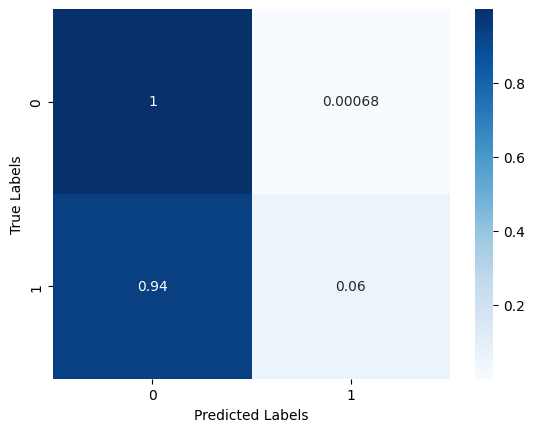

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix using a heatmap
sns.heatmap(inputs, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [7]:
y_pred_proba = model.predict(test_set)

555719/555719 [==============================] - 427s 768us/step


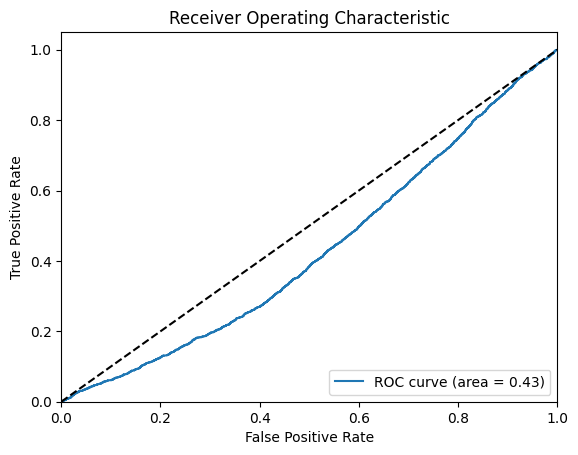

In [12]:
from sklearn.metrics import roc_curve, auc

# Calculate FPR, TPR, and thresholds using NumPy
fpr, tpr, thresholds = roc_curve(test_labels, y_pred_proba)

# Calculate AUC using scikit-learn
auc_score = auc(fpr, tpr)

# Plot ROC curve using Matplotlib
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
